In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)


In [2]:
import findspark
import os
findspark.init()
findspark.find()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from pyspark.sql.functions import rand
from pyspark.sql.types import StructType, StructField, IntegerType, ShortType, DateType, StringType, DecimalType, DoubleType, ByteType, FloatType
config = pyspark.SparkConf().setAll([('spark.executor.memory', '8g'), ('spark.executor.cores', '3'), ('spark.cores.max', '3'), ('spark.driver.memory','8g')])
sc = pyspark.SparkContext(conf=config)
spark = SparkSession.builder.appName("DataFrame").getOrCreate()
#spark.getConf().getAll()

#from pyspark import SparkContext
#SparkContext.setSystemProperty('spark.executor.memory', '6g')
#spark = SparkContext("local", "FannieMaeDataStudy")


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/02/21 13:52:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
sc.getConf().getAll()

[('spark.sql.warehouse.dir',
  'file:/Users/luis/Documents/Chase_DataStudy/spark-warehouse'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.app.id', 'local-1676435559262'),
 ('spark.cores.max', '3'),
 ('spark.app.startTime', '1676435558494'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.memory', '8g'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.host', 'luiss-mbp'),
 ('spark.master', 'local[*]'),
 ('spark.executor.memory', '8g'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.cores', '3'),
 ('spark.driver.port', '50816'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [3]:
path = '/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDataset_Compiled_HistoricalData/'
standard_origination_files = sorted(os.listdir(path))
standard_origination_files

['historical_data_1999Q1.txt',
 'historical_data_1999Q2.txt',
 'historical_data_1999Q3.txt',
 'historical_data_1999Q4.txt',
 'historical_data_2000Q1.txt',
 'historical_data_2000Q2.txt',
 'historical_data_2000Q3.txt',
 'historical_data_2000Q4.txt',
 'historical_data_2001Q1.txt',
 'historical_data_2001Q2.txt',
 'historical_data_2001Q3.txt',
 'historical_data_2001Q4.txt',
 'historical_data_2002Q1.txt',
 'historical_data_2002Q2.txt',
 'historical_data_2002Q3.txt',
 'historical_data_2002Q4.txt',
 'historical_data_2003Q1.txt',
 'historical_data_2003Q2.txt',
 'historical_data_2003Q3.txt',
 'historical_data_2003Q4.txt',
 'historical_data_2004Q1.txt',
 'historical_data_2004Q2.txt',
 'historical_data_2004Q3.txt',
 'historical_data_2004Q4.txt',
 'historical_data_2005Q1.txt',
 'historical_data_2005Q2.txt',
 'historical_data_2005Q3.txt',
 'historical_data_2005Q4.txt',
 'historical_data_2006Q1.txt',
 'historical_data_2006Q2.txt',
 'historical_data_2006Q3.txt',
 'historical_data_2006Q4.txt',
 'histor

In [4]:
schema_origination = StructType([
    StructField("CreditScore", ShortType(), True),
    StructField("FirstPaymentDate", StringType(), True),
    StructField("FirstTimeHomebuyerFlag", StringType(), True),
    StructField("MaturityDate", StringType(), True),
    StructField("MSA", IntegerType(), True),
    StructField("MortgageInsurancePerc", DecimalType(), True),
    StructField("NumberOfUnits", ByteType(), True),
    StructField("OccupancyStatus", StringType(), True),
    StructField("OrigCLTV", FloatType(), True),
    StructField("OrigDTI", FloatType(), True),
    StructField("OrigUPB", DoubleType(), True),
    StructField("OrigLTV", FloatType(), True),
    StructField("OrigInterestRate", DoubleType(), True),
    StructField("Channel", StringType(), True),
    StructField("PPM_Flag", StringType(), True),
    StructField("AmortizationType", StringType(), True),
    StructField("PropertyState", StringType(), True),
    StructField("PropertyType", StringType(), True),
    StructField("PostalCode", IntegerType(), True),
    StructField("LoanSeqNumber", StringType(), True),
    StructField("LoanPurpose", StringType(), True),
    StructField("OrigLoanTerms", ShortType(), True),
    StructField("NumBorrowers", ByteType(), True),
    StructField("SellerName", StringType(), True),
    StructField("ServicerName", StringType(), True),
    StructField("SuperConformingFlag", StringType(), True),
    StructField("PreHarpLoanSeqNum", StringType(), True),
    StructField("ProgramIndicator", StringType(), True),
    StructField("HarpIndicator", StringType(), True),
    StructField("PropertyValuationMethod", StringType(), True),
    StructField("InterestOnlyIndicator", StringType(), True)])

In [143]:
#test = spark.read.options(inferSchema='True', delimiter='|').csv("/Users/luis/Documents/Chase_DataStudy/Standard Loan-Level Dataset/historical_data_2022/historical_data_2022Q1/historical_data_time_2022Q1.txt", header = False, schema = schema)

In [151]:
num_files = len(standard_origination_files)
filename, nrows, distinctLoanSeqNumber, spark_file, unique_rate = [None] * num_files, [None] * num_files, [None] * num_files, [None] * num_files, [None] * num_files
for i in range(num_files):
    spark_file[i] = spark.read.options(inferSchema='True', delimiter='|').csv("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDataset_Compiled_HistoricalData/"+str(standard_origination_files[i]), header = False, schema=schema_origination)
    filename[i] = standard_origination_files[i]
    nrows[i] = spark_file[i].count()
    distinctLoanSeqNumber[i] = spark_file[i].select("LoanSeqNumber").distinct().count()
    unique_rate[i] = distinctLoanSeqNumber[i]/nrows[i]
    
### View size of files
data = {'FileName': filename,
        'Number_of_rows': nrows,
       'Number_of_Distinct_LoanSeqNumbers': distinctLoanSeqNumber,
       'LoanSeqNumber_UniqueRate': unique_rate}
  
# Create DataFrame for Output
file_sizes = pd.DataFrame(data)


### The Standard-Loan Level Dataset's UUID is LoanSeqNumbers

In [153]:
path = '/Users/luis/Documents/FannieMae_DataAssessment/Outputs/FileCounts_StandardOrigination.csv'
file_sizes.to_csv(path, index=False)
file_sizes

,FileName,Number_of_rows,Number_of_Distinct_LoanSeqNumbers,LoanSeqNumber_UniqueRate
0,historical_data_1999Q1.txt,487558,487558,1.0
1,historical_data_1999Q2.txt,339819,339819,1.0
2,historical_data_1999Q3.txt,223174,223174,1.0
3,historical_data_1999Q4.txt,172397,172397,1.0
4,historical_data_2000Q1.txt,117807,117807,1.0
5,historical_data_2000Q2.txt,184092,184092,1.0
6,historical_data_2000Q3.txt,209939,209939,1.0
7,historical_data_2000Q4.txt,236235,236235,1.0
8,historical_data_2001Q1.txt,405267,405267,1.0
9,historical_data_2001Q2.txt,629729,629729,1.0


### Create Struct for Performance History Data Below

In [3]:
schema_monthly_perf = StructType([
    StructField("LoanSeqNumber", StringType(), True),
    StructField("MonthlyReportingPeriod", StringType(), True),
    StructField("CurrentActualUPB", IntegerType(), True),
    StructField("CurrentLoanDelinquincyStatus", StringType(), True),
    StructField("LoanAge", ShortType(), True),
    StructField("RemainingMonthsToMaturity", ShortType(), True),
    StructField("DefectSettlementDate", StringType(), True),
    StructField("ModificationFlag", StringType(), True),
    StructField("ZeroBalanceCode", StringType(), True),
    StructField("ZeroBalanceEffectiveDate", StringType(), True),
    StructField("CurrentInterestRate", DoubleType(), True),
    StructField("CurrentDeferredUPB", IntegerType(), True),
    StructField("DDLPI", StringType(), True),
    StructField("MI_Recoveries", DoubleType(), True),
    StructField("NetSaleProceeds", StringType(), True),
    StructField("NonMI_Recoveries", DoubleType(), True),
    StructField("Expenses", DoubleType(), True),
    StructField("LegalCosts", DoubleType(), True),
    StructField("MaintenanceAndPreservationCosts", DoubleType(), True),
    StructField("TaxesAndInsurance", DoubleType(), True),
    StructField("MiscExpenses", DoubleType(), True),
    StructField("ActualLossCalculation", DoubleType(), True),
    StructField("ModificationCost", DoubleType(), True),
    StructField("StepModificationFlag", StringType(), True),
    StructField("DeferredPaymentPlan", StringType(), True),
    StructField("EstimatedLTV", FloatType(), True),
    StructField("ZeroBalanceRemovalUPB", DoubleType(), True),
    StructField("DelinquentAccruedInterest", DoubleType(), True),
    StructField("DelinquencyDueToDisaster", StringType(), True),
    StructField("BorrowerAssistanceStatusCode", StringType(), True),
    StructField("CurrentMonthModCost", DoubleType(), True),
    StructField("InterestBearingUPB", DoubleType(), True)])

In [4]:
standard_performance_files = sorted(os.listdir('/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDatasetTime_Compiled_HistoricalData/'))
standard_performance_files

['historical_data_time_1999Q1.txt',
 'historical_data_time_1999Q2.txt',
 'historical_data_time_1999Q3.txt',
 'historical_data_time_1999Q4.txt',
 'historical_data_time_2000Q1.txt',
 'historical_data_time_2000Q2.txt',
 'historical_data_time_2000Q3.txt',
 'historical_data_time_2000Q4.txt',
 'historical_data_time_2001Q1.txt',
 'historical_data_time_2001Q2.txt',
 'historical_data_time_2001Q3.txt',
 'historical_data_time_2001Q4.txt',
 'historical_data_time_2002Q1.txt',
 'historical_data_time_2002Q2.txt',
 'historical_data_time_2002Q3.txt',
 'historical_data_time_2002Q4.txt',
 'historical_data_time_2003Q1.txt',
 'historical_data_time_2003Q2.txt',
 'historical_data_time_2003Q3.txt',
 'historical_data_time_2003Q4.txt',
 'historical_data_time_2004Q1.txt',
 'historical_data_time_2004Q2.txt',
 'historical_data_time_2004Q3.txt',
 'historical_data_time_2004Q4.txt',
 'historical_data_time_2005Q1.txt',
 'historical_data_time_2005Q2.txt',
 'historical_data_time_2005Q3.txt',
 'historical_data_time_2005Q

In [5]:
num_files = len(standard_performance_files)
filename, nrows, distinctLoanSeqNumber, spark_file, unique_rate = [None] * num_files, [None] * num_files, [None] * num_files, [None] * num_files, [None] * num_files
for i in range(num_files):
    spark_file[i] = spark.read.options(inferSchema='True', delimiter='|').csv("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDatasetTime_Compiled_HistoricalData/"+str(standard_performance_files[i]), header = False, schema=schema_monthly_perf)
    filename[i] = standard_performance_files[i]
    nrows[i] = spark_file[i].count()
    distinctLoanSeqNumber[i] = spark_file[i].select("LoanSeqNumber").distinct().count()
    unique_rate[i] = distinctLoanSeqNumber[i]/nrows[i]
    
### View size of files
data = {'FileName': filename,
        'Number_of_rows': nrows,
       'Number_of_Distinct_LoanSeqNumbers': distinctLoanSeqNumber,
       'LoanSeqNumber_UniqueRate': unique_rate}
  
# Create DataFrame for Output
file_sizes = pd.DataFrame(data)

In [6]:
file_sizes.to_csv('/Users/luis/Documents/FannieMae_DataAssessment/Outputs/FileCounts_StandardMonthlyPerf.csv', index=False)
file_sizes

,FileName,Number_of_rows,Number_of_Distinct_LoanSeqNumbers,LoanSeqNumber_UniqueRate
0,historical_data_time_1999Q1.txt,29670516,487549,0.016432
1,historical_data_time_1999Q2.txt,19007073,339808,0.017878
2,historical_data_time_1999Q3.txt,9892796,223172,0.022559
3,historical_data_time_1999Q4.txt,6768065,172389,0.025471
4,historical_data_time_2000Q1.txt,3824594,117806,0.030802
5,historical_data_time_2000Q2.txt,4979140,184083,0.036971
6,historical_data_time_2000Q3.txt,5568337,209934,0.037701
7,historical_data_time_2000Q4.txt,6755989,236228,0.034966
8,historical_data_time_2001Q1.txt,15045691,405252,0.026935
9,historical_data_time_2001Q2.txt,23653573,629712,0.026622


## Combine files into parquet format (for quicker processing)

### This reduced Origination data size from 6.87 GB to 811.2 MB!

In [14]:
num_files = len(standard_origination_files)
spark_file = [None] * num_files
path = "/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDataset_Compiled_HistoricalData/"
for i in range(num_files):
    spark_file[i] = spark.read.options(inferSchema='True', 
                                       delimiter='|').csv(path+str(standard_origination_files[i]),
                                                          header = False, 
                                                          schema=schema_origination).withColumn("file", 
                                                                                                lit(standard_origination_files[i]))
    spark_file[i].coalesce(200).write.mode("overwrite").parquet(path+str(standard_origination_files[i])[0:22]+".parquet")

In [3]:
path = "/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDataset_Compiled_HistoricalData_Parquet/"
test = pd.read_parquet()

In [4]:
test.shape

(45432302, 32)

In [8]:
test.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyerFlag',
       'MaturityDate', 'MSA', 'MortgageInsurancePerc', 'NumberOfUnits',
       'OccupancyStatus', 'OrigCLTV', 'OrigDTI', 'OrigUPB', 'OrigLTV',
       'OrigInterestRate', 'Channel', 'PPM_Flag', 'AmortizationType',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNumber',
       'LoanPurpose', 'OrigLoanTerms', 'NumBorrowers', 'SellerName',
       'ServicerName', 'SuperConformingFlag', 'PreHarpLoanSeqNum',
       'ProgramIndicator', 'HarpIndicator', 'PropertyValuationMethod',
       'InterestOnlyIndicator', 'file'],
      dtype='object')

In [6]:
read_parquet = pd.read_parquet("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDataset_Compiled_HistoricalData_Parquet/"+str(standard_origination_files[i])+".parquet")

### This reduced Monthly Performance data size from 219.16 GB to 15.95 GB!

In [5]:
num_files = len(standard_performance_files)
spark_file = [None] * num_files
for i in range(num_files):
    spark_file[i] = spark.read.options(inferSchema='True', delimiter='|').csv("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDatasetTime_Compiled_HistoricalData/"+str(standard_performance_files[i]), header = False, schema=schema_monthly_perf).withColumn("file", lit(standard_performance_files[i]))
    spark_file[i].coalesce(200).write.mode("overwrite").parquet("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDatasetTime_Compiled_HistoricalData_Parquet/"+str(standard_performance_files[i])[0:27]+".parquet")

23/02/15 22:27:11 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [17]:
test = spark.read.format("parquet").load("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDatasetTime_Compiled_HistoricalData_Parquet/historical_data_time_2001Q4.parquet")

In [18]:
test.count()

42105765

In [ ]:
pd.DataFrame(test.sample(fraction=1.0).limit(100).collect())

## Analyze Origination Data

In [3]:
orig = pd.read_parquet("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDataset_Compiled_HistoricalData_Parquet/")

In [28]:
orig.shape

(45432302, 32)

In [29]:
orig.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyerFlag',
       'MaturityDate', 'MSA', 'MortgageInsurancePerc', 'NumberOfUnits',
       'OccupancyStatus', 'OrigCLTV', 'OrigDTI', 'OrigUPB', 'OrigLTV',
       'OrigInterestRate', 'Channel', 'PPM_Flag', 'AmortizationType',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNumber',
       'LoanPurpose', 'OrigLoanTerms', 'NumBorrowers', 'SellerName',
       'ServicerName', 'SuperConformingFlag', 'PreHarpLoanSeqNum',
       'ProgramIndicator', 'HarpIndicator', 'PropertyValuationMethod',
       'InterestOnlyIndicator', 'file'],
      dtype='object')

In [35]:
orig.dtypes

CreditScore                int16  
FirstPaymentDate           object 
FirstTimeHomebuyerFlag     object 
MaturityDate               object 
MSA                        float64
MortgageInsurancePerc      object 
NumberOfUnits              int8   
OccupancyStatus            object 
OrigCLTV                   float32
OrigDTI                    float32
OrigUPB                    float64
OrigLTV                    float32
OrigInterestRate           float64
Channel                    object 
PPM_Flag                   object 
AmortizationType           object 
PropertyState              object 
PropertyType               object 
PostalCode                 int32  
LoanSeqNumber              object 
LoanPurpose                object 
OrigLoanTerms              float64
NumBorrowers               int8   
SellerName                 object 
ServicerName               object 
SuperConformingFlag        object 
PreHarpLoanSeqNum          object 
ProgramIndicator           object 
HarpIndicator       

In [50]:
orig.CreditScore.dtype in ['int16', 'int32']

True

In [47]:
orig.CreditScore.dtype == 'int16'

True

In [7]:
# create firingrate and uniquerate function

def firingRate(df):
    return 1-df.isna().sum(axis=0)/df.shape[0]

def uniqueCount(df):
    return df.nunique()

def uniqueRate(df):
    return df.nunique()/df.shape[0]


In [8]:
def firingRateDetailed(df):
    output = []
    firingRate = 1-df.isna().sum(axis=0)/df.shape[0]
    uniqueCount = df.nunique()
    uniqueRate = df.nunique()/df.shape[0]
    for i in df.columns:
        if df[i].dtype == 'O':
            if df[i].nunique() <= 15:
                output.append(df[i].value_counts(dropna = False, 
                                                 normalize = True))
            else:
                output.append((i+': Categorical Column with '+ 
                               str(df[i].nunique()) + ' groups'))
        elif (df[i].dtype in ['int8','int16','int32','int64','float32','float64']):
            output.append(df[i].describe())
    final = pd.DataFrame({'Column': df.columns,
                          'firingRate': firingRate,
                          'uniqueCount': uniqueCount,
                          'uniqueRate': uniqueRate,
                   'Detailed_Summary': output})
    return(final)
        

In [53]:
view = firingRateDetailed(orig)
view

,Column,firingRate,uniqueCount,uniqueRate,Detailed_Summary
CreditScore,CreditScore,1.000000,498,1.096136e-05,"count 4.543230e+07 mean 7.578710e+02 std 3.799151e+02 min 3.000000e+02 25% 7.090000e+02 50% 7.530000e+02 75% 7.840000e+02 max 9.999000e+03 Name: CreditScore, dtype: float64"
FirstPaymentDate,FirstPaymentDate,1.000000,287,6.317091e-06,FirstPaymentDate: Categorical Column with 287 groups
FirstTimeHomebuyerFlag,FirstTimeHomebuyerFlag,1.000000,3,6.603231e-08,"N 0.892735 Y 0.106847 9 0.000419 Name: FirstTimeHomebuyerFlag, dtype: float64"
MaturityDate,MaturityDate,1.000000,628,1.382276e-05,MaturityDate: Categorical Column with 628 groups
MSA,MSA,0.756886,437,9.618707e-06,"count 3.438709e+07 mean 3.040496e+04 std 1.131248e+04 min 1.018000e+04 25% 1.934000e+04 50% 3.282000e+04 75% 4.006000e+04 max 4.974000e+04 Name: MSA, dtype: float64"
MortgageInsurancePerc,MortgageInsurancePerc,1.000000,57,1.254614e-06,MortgageInsurancePerc: Categorical Column with 57 groups
NumberOfUnits,NumberOfUnits,1.000000,5,1.100539e-07,"count 4.543230e+07 mean 1.032741e+00 std 7.588606e-01 min 1.000000e+00 25% 1.000000e+00 50% 1.000000e+00 75% 1.000000e+00 max 9.900000e+01 Name: NumberOfUnits, dtype: float64"
OccupancyStatus,OccupancyStatus,1.000000,4,8.804308e-08,"P 9.075887e-01 I 5.507828e-02 S 3.733298e-02 9 2.201077e-08 Name: OccupancyStatus, dtype: float64"
OrigCLTV,OrigCLTV,1.000000,667,1.468118e-05,"count 4.543230e+07 mean 4.733726e+01 std 3.012467e+01 min 1.000000e+00 25% 6.000000e+01 50% 7.500000e+01 75% 8.000000e+01 max 9.990000e+02 Name: OrigCLTV, dtype: float64"
OrigDTI,OrigDTI,1.000000,66,1.452711e-06,"count 4.543230e+07 mean 8.803133e+01 std 2.425673e+02 min 1.000000e+00 25% 2.600000e+01 50% 3.500000e+01 75% 4.300000e+01 max 9.990000e+02 Name: OrigDTI, dtype: float64"


In [ ]:
#view.iloc[2:5,0:1]

In [55]:
view.to_csv('/Users/luis/Documents/FannieMae_DataAssessment/Outputs/origination_file_DetailedExploratory.csv', index= False)

In [4]:
## Create year column, and clean '999' in DTI/CLTV calculations ("Not Available")
def convert_quarter_to_year(x):
    return x[16:20]

orig['year'] = [convert_quarter_to_year(i) for i in orig.file]
orig['cleanOrigDTI'] = [None if i == 999 else i for i in orig.OrigDTI]
orig['cleanOrigCLTV'] = [None if j == 999 else j for j in orig.OrigCLTV]
orig['cleanOrigLTV'] = [None if k == 999 else k for k in orig.OrigLTV]

In [30]:
mean_cltv = orig.groupby("year").cleanOrigCLTV.mean()
mean_dti = orig.groupby("year").cleanOrigDTI.mean()
mean_upb = orig.groupby("year").OrigUPB.mean()
mean_ltv = orig.groupby("year").cleanOrigLTV.mean()
mean_creditscore = orig.groupby("year").CreditScore.mean()
mean_OrigInterestRate = orig.groupby("year").OrigInterestRate.mean()
mean_NumberOfUnits = orig.groupby("year").NumberOfUnits.mean()
countrec = orig.groupby("year").LoanSeqNumber.count()

data = {
    'count': countrec,
    'mean_cltv': mean_cltv,
    'mean_dti': mean_dti,
    'mean_upb': mean_upb,
    'mean_ltv': mean_ltv,
    'mean_creditscore': mean_creditscore,
    'mean_interestrate': mean_OrigInterestRate,
    'mean_NumberOfUnits': mean_NumberOfUnits
}

mean_data = pd.DataFrame(data)
mean_data.to_csv('/Users/luis/Documents/FannieMae_DataAssessment/Outputs/origination_file_NumericMeans.csv', index=False)
mean_data

In [34]:
mean_data = output

In [36]:
output

,count,mean_cltv,mean_dti,mean_upb,mean_ltv,mean_creditscore,mean_interestrate,mean_NumberOfUnits
year,,,,,,,,
1999,1222948,70.524592,31.138274,114772.635468,70.436409,777.547621,7.169780,1.037661
2000,748073,73.286923,33.498391,124854.066381,72.773051,845.639373,8.107629,1.033696
2001,2500648,70.733095,31.790531,136989.050438,70.203301,768.353898,6.799028,1.029804
2002,2992712,68.574446,31.692824,143397.353638,67.819860,823.689599,6.275438,1.029182
2003,3904447,66.743047,30.216018,144664.413168,65.751701,740.052961,5.455928,1.023460
2004,1677237,70.239614,33.341056,154483.368779,68.822709,731.958238,5.630212,1.041801
2005,1611571,70.562596,35.215200,170426.590575,68.902802,732.002100,5.799746,1.029590
2006,1193600,72.562344,36.479986,178946.518934,69.990823,731.014499,6.402241,1.028464
2007,1238341,74.071072,36.632003,182848.695149,71.432417,733.045584,6.364408,1.034642


## Analyze Performance data

In [3]:

perf = spark.read.format("parquet").load("/Users/luis/Documents/FannieMae_DataAssessment/StandardLoanLevelDatasetTime_Compiled_HistoricalData_Parquet/*")


In [5]:
perf.count() ### Over 2 billions rows!

2321668446

In [17]:
## I have to sample because this dataset contains over 2 billions row.
perf_sample = pd.DataFrame(perf.sample(fraction = 1.0, withReplacement = False).limit(10000000).collect())
perf_sample.columns = ["LoanSeqNumber", "MonthlyReportingPeriod", "CurrentActualUPB", 
                  "CurrentLoanDelinquincyStatus", "LoanAge", "RemainingMonthsToMaturity", 
                  "DefectSettlementDate", "ModificationFlag", "ZeroBalanceCode", 
                  "ZeroBalanceEffectiveDate", "CurrentInterestRate", "CurrentDeferredUPB", 
                  "DDLPI", "MI_Recoveries", "NetSaleProceeds", "NonMI_Recoveries", 
                  "Expenses", "LegalCosts", "MaintenanceAndPreservationCosts",
                  "TaxesAndInsurance", "MiscExpenses", "ActualLossCalculation", 
                  "ModificationCost", "StepModificationFlag", "DeferredPaymentPlan", 
                  "EstimatedLTV", "ZeroBalanceRemovalUPB", "DelinquentAccruedInterest", 
                  "DelinquencyDueToDisaster", "BorrowerAssistanceStatusCode", 
                  "CurrentMonthModCost", "InterestBearingUPB","file"]

In [15]:
perf_sample.dtypes

LoanSeqNumber                       object
MonthlyReportingPeriod              object
CurrentActualUPB                    object
CurrentLoanDelinquincyStatus        object
LoanAge                              int64
RemainingMonthsToMaturity            int64
DefectSettlementDate                object
ModificationFlag                    object
ZeroBalanceCode                     object
ZeroBalanceEffectiveDate            object
CurrentInterestRate                float64
CurrentDeferredUPB                  object
DDLPI                               object
MI_Recoveries                      float64
NetSaleProceeds                     object
NonMI_Recoveries                   float64
Expenses                           float64
LegalCosts                         float64
MaintenanceAndPreservationCosts    float64
TaxesAndInsurance                  float64
MiscExpenses                       float64
ActualLossCalculation              float64
ModificationCost                   float64
StepModific

In [18]:
view = firingRateDetailed(perf_sample)
view

,Column,firingRate,uniqueCount,uniqueRate,Detailed_Summary
LoanSeqNumber,LoanSeqNumber,1.000000,386975,3.869750e-02,LoanSeqNumber: Categorical Column with 386975 ...
MonthlyReportingPeriod,MonthlyReportingPeriod,1.000000,75,7.500000e-06,MonthlyReportingPeriod: Categorical Column wit...
CurrentActualUPB,CurrentActualUPB,0.000000,0,0.000000e+00,"None 1.0 Name: CurrentActualUPB, dtype: flo..."
CurrentLoanDelinquincyStatus,CurrentLoanDelinquincyStatus,1.000000,69,6.900000e-06,CurrentLoanDelinquincyStatus: Categorical Colu...
LoanAge,LoanAge,1.000000,75,7.500000e-06,count 1.000000e+07 mean 1.519601e+01 st...
RemainingMonthsToMaturity,RemainingMonthsToMaturity,1.000000,395,3.950000e-05,count 1.000000e+07 mean 2.943880e+02 st...
DefectSettlementDate,DefectSettlementDate,0.000082,40,4.000000e-06,DefectSettlementDate: Categorical Column with ...
ModificationFlag,ModificationFlag,0.000584,2,2.000000e-07,None 0.999416 P 0.000536 Y 0.00...
ZeroBalanceCode,ZeroBalanceCode,0.012910,6,6.000000e-07,None 9.870896e-01 01 1.282530e-02 96 ...
ZeroBalanceEffectiveDate,ZeroBalanceEffectiveDate,0.012910,76,7.600000e-06,ZeroBalanceEffectiveDate: Categorical Column w...


In [19]:
view.to_csv('/Users/luis/Documents/FannieMae_DataAssessment/Outputs/performance_file_DetailedExploratory.csv')

## Loan to Value Ratios Throughout the Years

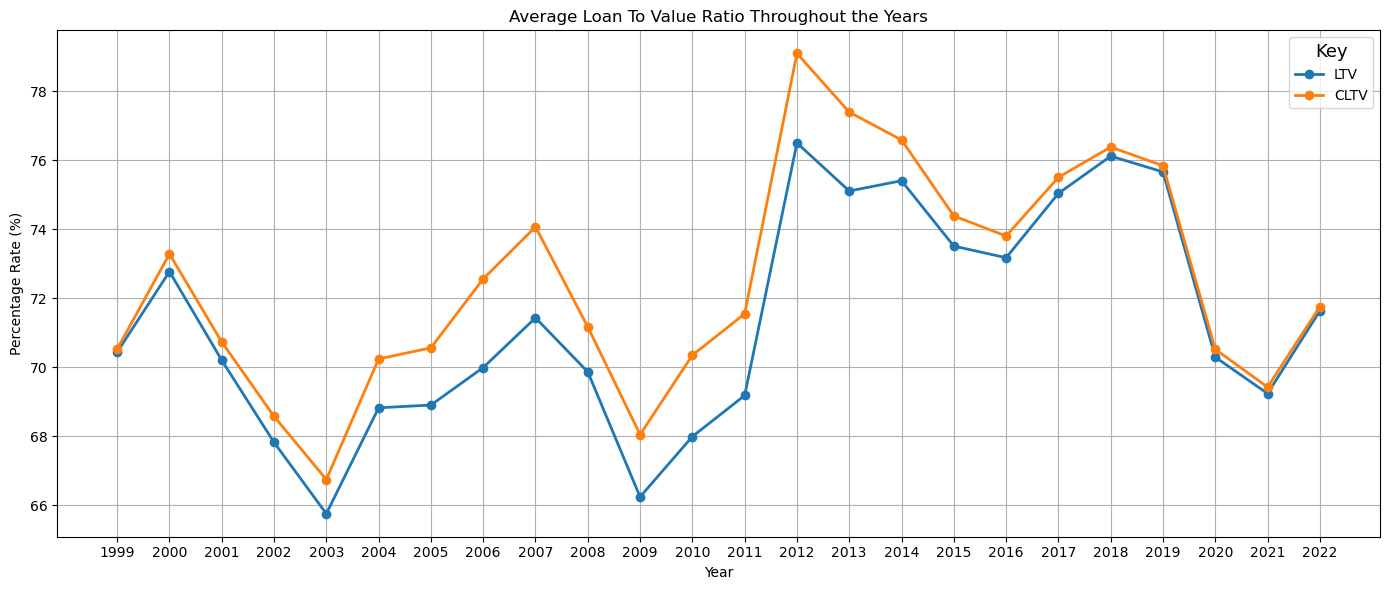

In [67]:
plot_data = mean_data[['mean_ltv', 'mean_cltv']]
plt.figure(figsize=(14,6), tight_layout=True)
#plotting
plt.plot(plot_data, 'o-', linewidth=2)
plt.grid()

#customization
plt.xticks(sorted(plot_data.index))
plt.xlabel('Year')
plt.ylabel('Percentage Rate (%)')
plt.title('Average Loan To Value Ratio Throughout the Years')
plt.legend(title='Key', title_fontsize = 13, labels=['LTV', 'CLTV'])
plt.show()

## Average Credit Score Throughout Years

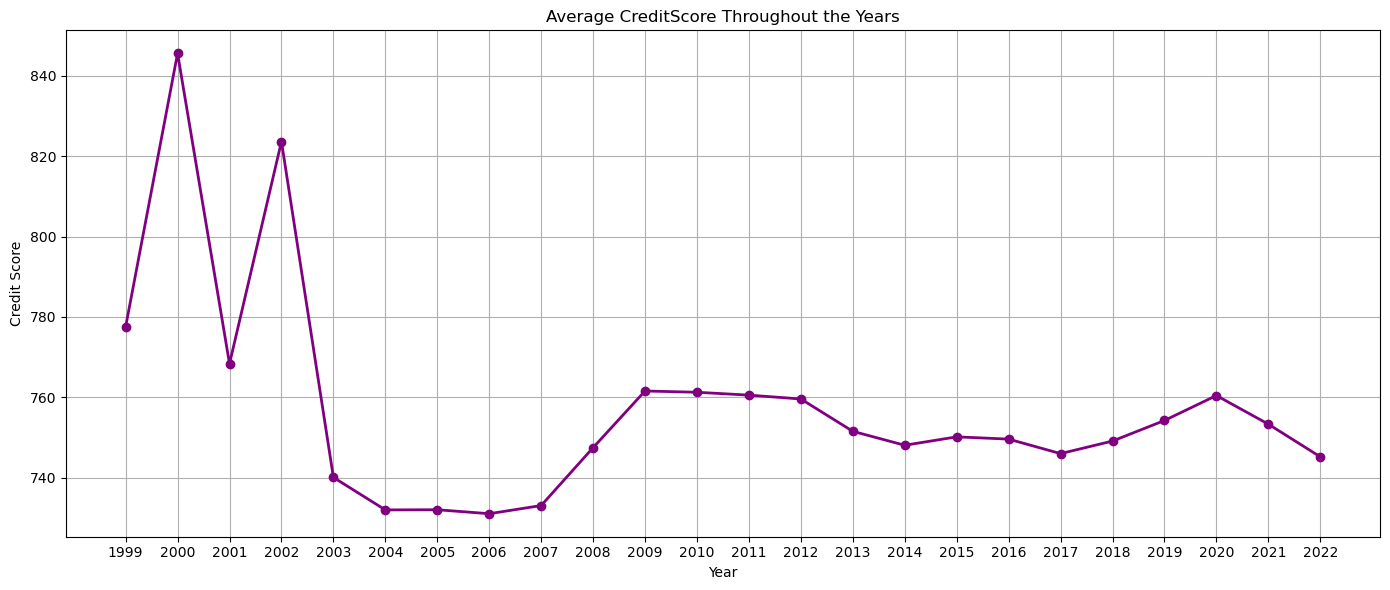

In [78]:
plot_data = mean_data[['mean_creditscore']]
plt.figure(figsize=(14,6), tight_layout=True)
#plotting
plt.plot(plot_data, 'o-', linewidth=2, color = 'purple')
plt.grid()

#customization
plt.xticks(sorted(plot_data.index))
plt.xlabel('Year')
plt.ylabel('Credit Score')
plt.title('Average CreditScore Throughout the Years')
#plt.legend(title='Key', title_fontsize = 13, labels=['LTV', 'CLTV'])
plt.show()

## DTI Throughout the Years

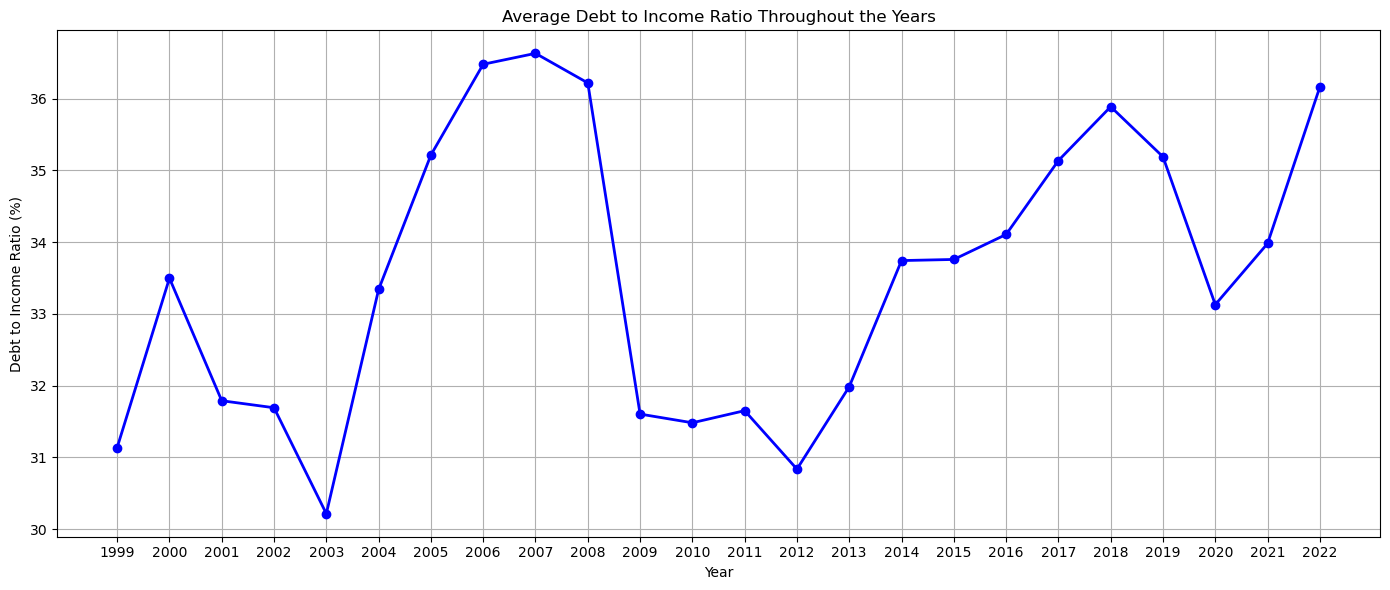

In [68]:
plot_data = mean_data[['mean_dti']]
plt.figure(figsize=(14,6), tight_layout=True)
#plotting
plt.plot(plot_data, 'o-', linewidth=2, color = 'blue')
plt.grid()

#customization
plt.xticks(sorted(plot_data.index))
plt.xlabel('Year')
plt.ylabel('Debt to Income Ratio (%)')
plt.title('Average Debt to Income Ratio Throughout the Years')
#plt.legend(title='Key', title_fontsize = 13, labels=['LTV', 'CLTV'])
plt.show()

## Loan Interest Rates throughout the years

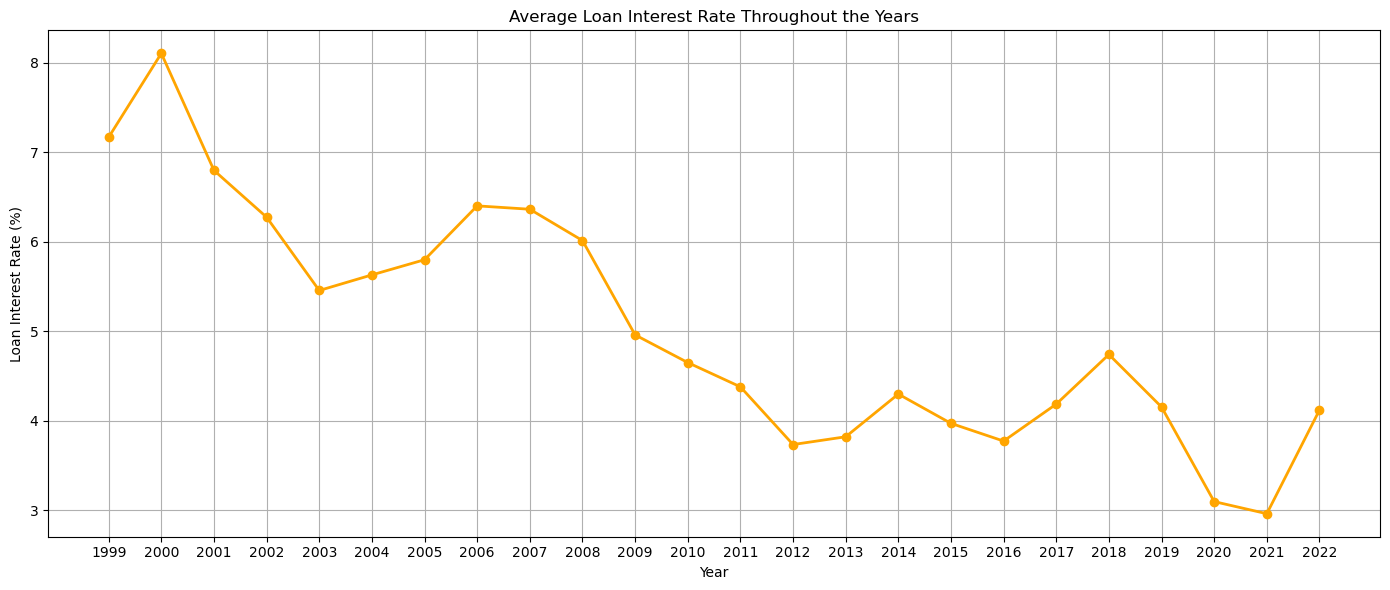

In [85]:
plot_data = mean_data[['mean_interestrate']]
plt.figure(figsize=(14,6), tight_layout=True)
#plotting
plt.plot(plot_data, 'o-', linewidth=2, color = 'orange')
plt.grid()

#customization
plt.xticks(sorted(plot_data.index))
plt.xlabel('Year')
plt.ylabel('Loan Interest Rate (%)')
plt.title('Average Loan Interest Rate Throughout the Years')
#plt.legend(title='Key', title_fontsize = 13, labels=['LTV', 'CLTV'])
plt.show()

## Number of Loans throughout years (Count of LoanSeqNumbers)

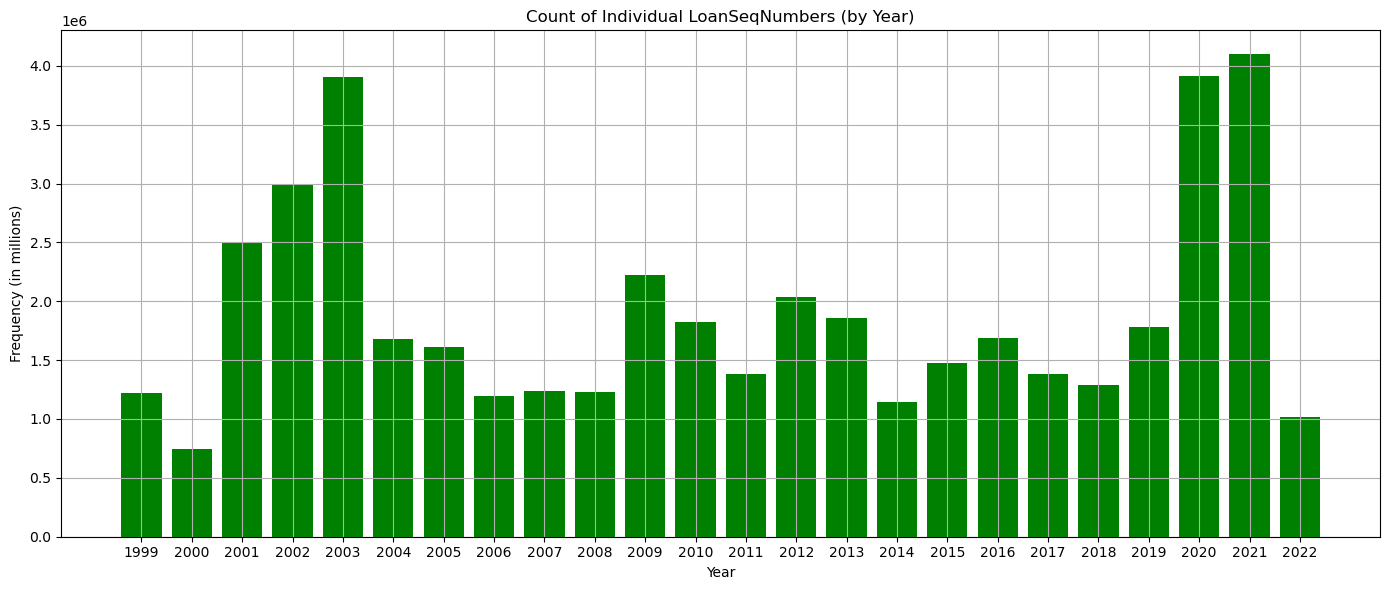

In [79]:
plot_data = mean_data[['count']]
plt.figure(figsize=(14,6), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(plot_data.index, plot_data['count'], color="green")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Frequency (in millions)')
plt.title('Count of Individual LoanSeqNumbers (by Year)')
plt.show()

## Display Mean UPB throughout the Years

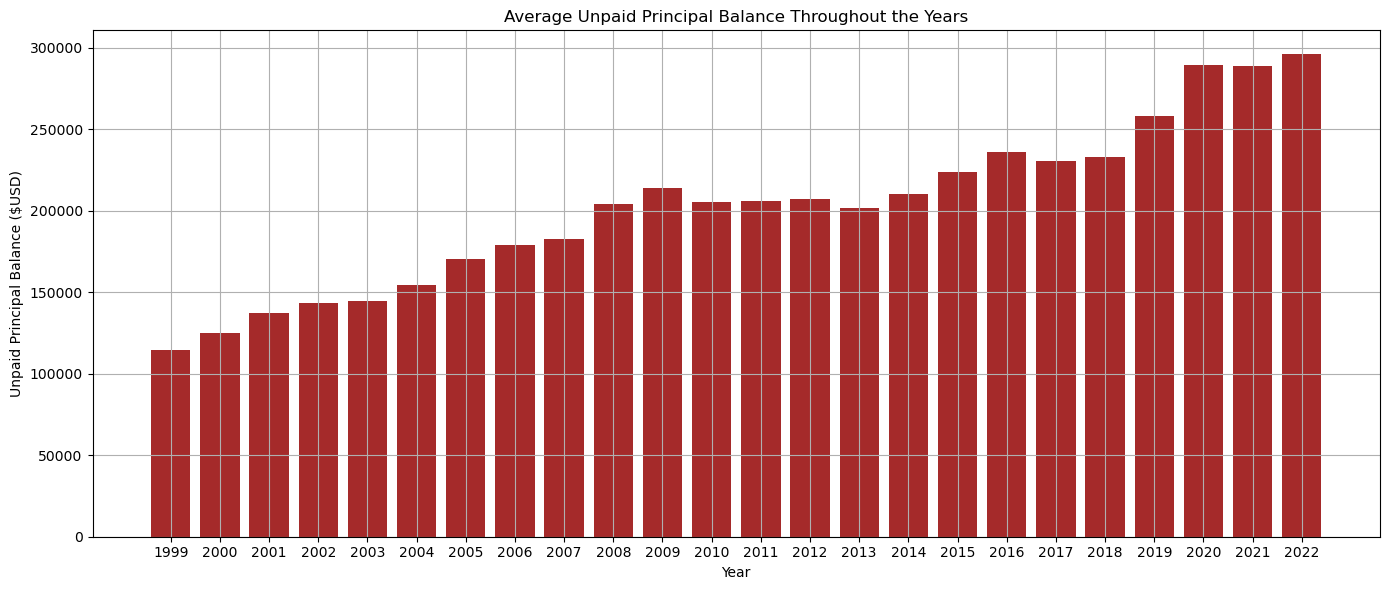

In [81]:
plot_data = mean_data[['mean_upb']]
plt.figure(figsize=(14,6), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(plot_data.index, plot_data['mean_upb'], color="brown")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Unpaid Principal Balance ($USD)')
plt.title('Average Unpaid Principal Balance Throughout the Years')
plt.show()

## Analyze 2021 Sample

In [16]:
sample = pd.read_csv('/Users/luis/Downloads/sample_2021/sample_orig_2021.txt', delimiter = '|', header=None)
sample_historical = pd.read_csv('/Users/luis/Downloads/sample_2021/sample_svcg_2021.txt', delimiter = '|', header=None)
(sample.shape, sample_historical.shape)

/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_748/4194948997.py:2: DtypeWarning: Columns (7,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_historical = pd.read_csv('/Users/luis/Downloads/sample_2021/sample_svcg_2021.txt', delimiter = '|', header=None)


((50000, 31), (699854, 32))

In [17]:
sample.columns = ["CreditScore", "FirstPaymentDate",
                  "FirstTimeHomebuyerFlag", "MaturityDate", 
                  "MSA", "MortgageInsurancePerc", 
                  "NumberOfUnits", "OccupancyStatus",
                  "OrigCLTV", "OrigDTI", "OrigUPB", 
                  "OrigLTV", "OrigInterestRate", "Channel",
                  "PPM_Flag", "AmortizationType", "PropertyState", 
                  "PropertyType", "PostalCode","LoanSeqNumber", 
                  "LoanPurpose", "OrigLoanTerms", "NumBorrowers", 
                  "SellerName", "ServicerName", "SuperConformingFlag",
                  "PreHarpLoanSeqNum", "ProgramIndicator", "HarpIndicator", 
                  "PropertyValuationMethod", "InterestOnlyIndicator"]

sample_historical.columns = ["LoanSeqNumber", "MonthlyReportingPeriod", "CurrentActualUPB", 
                  "CurrentLoanDelinquincyStatus", "LoanAge", "RemainingMonthsToMaturity", 
                  "DefectSettlementDate", "ModificationFlag", "ZeroBalanceCode", 
                  "ZeroBalanceEffectiveDate", "CurrentInterestRate", "CurrentDeferredUPB", 
                  "DDLPI", "MI_Recoveries", "NetSaleProceeds", "NonMI_Recoveries", 
                  "Expenses", "LegalCosts", "MaintenanceAndPreservationCosts",
                  "TaxesAndInsurance", "MiscExpenses", "ActualLossCalculation", 
                  "ModificationCost", "StepModificationFlag", "DeferredPaymentPlan", 
                  "EstimatedLTV", "ZeroBalanceRemovalUPB", "DelinquentAccruedInterest", 
                  "DelinquencyDueToDisaster", "BorrowerAssistanceStatusCode", 
                  "CurrentMonthModCost", "InterestBearingUPB"]





In [18]:
sample.sample(10)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyerFlag,MaturityDate,MSA,MortgageInsurancePerc,NumberOfUnits,OccupancyStatus,OrigCLTV,OrigDTI,OrigUPB,OrigLTV,OrigInterestRate,Channel,PPM_Flag,AmortizationType,PropertyState,PropertyType,PostalCode,LoanSeqNumber,LoanPurpose,OrigLoanTerms,NumBorrowers,SellerName,ServicerName,SuperConformingFlag,PreHarpLoanSeqNum,ProgramIndicator,HarpIndicator,PropertyValuationMethod,InterestOnlyIndicator
41946,746,202201,N,205112,38900.0,0,1,P,65,33,292000,65,3.875,C,N,FRM,OR,SF,97000,F21Q40309322,C,360,2,PENNYMAC CORP.,PENNYMAC CORP.,NaN,NaN,9,NaN,1,N
48169,774,202202,N,203701,18580.0,0,1,P,68,29,135000,68,1.990,R,N,FRM,TX,SF,78400,F21Q40738879,N,180,2,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,MATRIX FINANCIAL SERVICES CORPORATION,NaN,NaN,9,NaN,1,N
32857,739,202111,N,205110,38060.0,0,1,P,63,31,548000,63,3.375,C,N,FRM,AZ,SF,85200,F21Q30658283,P,360,1,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",NaN,NaN,9,NaN,2,N
11432,791,202105,N,205104,31084.0,0,1,P,70,48,453000,70,2.690,B,N,FRM,CA,SF,91300,F21Q12391519,N,360,2,"QUICKEN LOANS, LLC",ONSLOW BAY FINANCIAL LLC,NaN,NaN,9,NaN,1,N
12116,785,202105,Y,205104,41740.0,30,1,P,91,47,753000,91,3.125,C,N,FRM,CA,SF,92000,F21Q12456590,P,360,1,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,"MARLIN MORTGAGE CAPITAL, LLC",Y,NaN,9,NaN,2,N
37998,786,202112,N,205111,40140.0,25,1,P,90,50,500000,90,2.750,R,N,FRM,CA,SF,92300,F21Q40033598,P,360,1,"CALIBER HOME LOANS, INC.","CALIBER HOME LOANS, INC.",NaN,NaN,9,NaN,2,N
46448,643,202202,N,205201,26420.0,0,1,P,46,39,129000,43,3.375,R,N,FRM,TX,PU,77300,F21Q40618257,N,360,1,NATIONSTAR MORTGAGE LLC DBA MR. COOPER,Other servicers,NaN,NaN,9,NaN,1,N
39946,754,202112,Y,205111,19740.0,16,1,P,95,47,499000,95,2.625,R,N,FRM,CO,PU,80100,F21Q40169635,P,360,1,Other sellers,Other servicers,NaN,NaN,H,NaN,2,N
9419,811,202105,N,205104,37340.0,0,1,P,37,47,106000,37,3.000,R,N,FRM,FL,SF,32700,F21Q12192376,C,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
5413,666,202104,N,205103,NaN,12,1,P,85,30,368000,85,2.999,B,N,FRM,MD,SF,21600,F21Q11807090,N,360,2,"UNITED WHOLESALE MORTGAGE, LLC","UNITED WHOLESALE MORTGAGE, LLC",NaN,NaN,9,NaN,1,N


In [20]:
sample_historical.sample(10)

,LoanSeqNumber,MonthlyReportingPeriod,CurrentActualUPB,CurrentLoanDelinquincyStatus,LoanAge,RemainingMonthsToMaturity,DefectSettlementDate,ModificationFlag,ZeroBalanceCode,ZeroBalanceEffectiveDate,CurrentInterestRate,CurrentDeferredUPB,DDLPI,MI_Recoveries,NetSaleProceeds,NonMI_Recoveries,Expenses,LegalCosts,MaintenanceAndPreservationCosts,TaxesAndInsurance,MiscExpenses,ActualLossCalculation,ModificationCost,StepModificationFlag,DeferredPaymentPlan,EstimatedLTV,ZeroBalanceRemovalUPB,DelinquentAccruedInterest,DelinquencyDueToDisaster,BorrowerAssistanceStatusCode,CurrentMonthModCost,InterestBearingUPB
342169,F21Q20568912,202110,169000.00,0,3,357,NaN,NaN,NaN,NaN,3.250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,169000.00
668264,F21Q40619747,202112,136000.00,0,0,360,NaN,NaN,NaN,NaN,3.250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,NaN,NaN,NaN,NaN,NaN,136000.00
198984,F21Q12339728,202206,408337.60,0,14,346,NaN,NaN,NaN,NaN,2.750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,408337.60
131817,F21Q11971018,202204,350712.53,0,12,288,NaN,NaN,NaN,NaN,2.750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,350712.53
637323,F21Q40402728,202209,322947.29,0,9,351,NaN,NaN,NaN,NaN,3.250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN,322947.29
457930,F21Q30247742,202109,123000.00,0,1,119,NaN,NaN,NaN,NaN,2.125,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,123000.00
633588,F21Q40378156,202209,246093.46,0,9,351,NaN,NaN,NaN,NaN,2.990,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,246093.46
691354,F21Q40796896,202204,398000.00,0,3,357,NaN,NaN,NaN,NaN,3.350,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,NaN,NaN,398000.00
345114,F21Q20583772,202207,312094.04,0,12,348,NaN,NaN,NaN,NaN,2.999,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,NaN,312094.04
289533,F21Q20310394,202206,233948.39,0,12,168,NaN,NaN,NaN,NaN,3.250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN,NaN,233948.39


In [21]:
join = sample_historical.merge(sample, on = 'LoanSeqNumber', how = 'left')
(sample_historical.shape, join.shape)

((699854, 32), (699854, 62))

In [139]:
zip_len = [None] * orig.shape[0]
for i in range(len(orig.PostalCode)):
    zip_len[i] = len(str(orig.PostalCode[i]))
orig['Zip_Length'] = zip_len
orig.Zip_Length.value_counts()
    
    

5    41729141
4    3635897 
3    65542   
1    1722    
Name: Zip_Length, dtype: int64

In [162]:
zip_len2 = [None] * ny_state_to_fips.shape[0]
fip_list = list(ny_state_to_fips.ZIP)
for i in range(len(ny_state_to_fips.ZIP)):
    zip_len2[i] = len(str(fip_list[i]))
ny_state_to_fips['Zip_Length'] = zip_len2
ny_state_to_fips.Zip_Length.value_counts()

/var/folders/_r/yzz9jx7j0p507p32bxp3lh880000gn/T/ipykernel_49211/1003223950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_state_to_fips['Zip_Length'] = zip_len2


5    2476
4    1   
3    1   
Name: Zip_Length, dtype: int64

In [ ]:
new_zip = [None] * orig.shape[0]
for i in range(len(orig.PostalCode)):
    if zip_len[i] == 3:
        new_zip[i] = '00'+str(orig.PostalCode[i])
    elif zip_len[i] == 4:
        new_zip[i] = '0'+str(orig.PostalCode[i])
    else:
        new_zip[i] = str(orig.PostalCode[i])
        

        

In [136]:
orig.shape[0]

45432302

In [5]:
state_to_fips = pd.read_csv('/Users/luis/Documents/FannieMae_DataAssessment/ZIP-COUNTY-FIPS_2017-06.csv')
ny_state_to_fips = state_to_fips[state_to_fips.STATE == 'NY']
ny_state_to_fips.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
30263,12183,Albany County,NY,36001,H1
30264,12158,Albany County,NY,36001,H1
30265,12161,Albany County,NY,36001,H1
30266,12201,Albany County,NY,36001,H1
30267,12306,Albany County,NY,36001,H1


In [6]:
ny_orig = orig[(orig.PropertyState == 'NY') & (orig.year == '2021')]

In [ ]:
ny_orig['ZIP'] = str(ny_orig['PostalCode'])
ny_state_to_fips['ZIP'] = str(list(ny_state_to_fips['ZIP']))
ny_orig_join_2021 = pd.merge(ny_orig, ny_state_to_fips, on='ZIP', how='left')
ny_orig_join_2021.iloc[0:10,:]

In [8]:
ny_orig_join_2021.STCOUNTYFP.nunique()

0

In [132]:
state_to_fips.dtypes

ZIP           int64 
COUNTYNAME    object
STATE         object
STCOUNTYFP    int64 
CLASSFP       object
dtype: object

In [121]:
len(ny_state_to_fips)

2478

In [130]:
orig[orig.PropertyState == 'NY'].shape

(1578637, 36)

In [ ]:
ny_orig.shape

In [128]:
orig.PropertyState.value_counts()

CA    5718236
FL    2650077
TX    2600696
IL    2345510
MI    1794951
OH    1779685
NY    1578637
PA    1489969
NC    1404682
GA    1350397
VA    1345514
WA    1327628
MN    1295356
AZ    1290570
NJ    1262716
CO    1226078
MA    1144182
IN    1124124
WI    1120658
MD    1033580
MO    1015149
OR    806828 
TN    747035 
UT    651960 
KY    648428 
SC    645398 
CT    476317 
AL    463141 
IA    460660 
NV    456692 
KS    399988 
LA    352838 
OK    343844 
ID    298301 
NH    272394 
NE    268552 
AR    255332 
NM    222527 
ME    193774 
DE    164552 
MT    164015 
RI    149885 
MS    143603 
WV    138966 
VT    136693 
HI    133946 
SD    102336 
AK    101323 
ND    93368  
DC    90613  
WY    77007  
PR    63704  
GU    8047   
VI    1839   
Name: PropertyState, dtype: int64

In [ ]:
## join origination Data with FIPS data by zip

In [ ]:
test = orig.in

## Census Data - New Yok State

In [ ]:
import pandas as pd
!pip install censusdata
import censusdata
from tabulate import tabulate

In [113]:
#df = censusdata.download('acs5', 
#           2015,
#           censusdata.censusgeo([('state', '36'), ('county', '*')]),
#           ['B08301_001E', 'B08301_010E'])

df = censusdata.download('acs5', 
           2020,
           censusdata.censusgeo([('state', '36'), ('county', '*')]),
                         ['B08301_001E', 'B08301_010E'])
df

,B08301_001E,B08301_010E
"Allegany County, New York: Summary level: 050, state:36> county:003",19219,58
"Cattaraugus County, New York: Summary level: 050, state:36> county:009",32618,177
"Chemung County, New York: Summary level: 050, state:36> county:015",36332,524
"Columbia County, New York: Summary level: 050, state:36> county:021",28671,765
"Dutchess County, New York: Summary level: 050, state:36> county:027",143623,6899
"Essex County, New York: Summary level: 050, state:36> county:031",16563,72
"Genesee County, New York: Summary level: 050, state:36> county:037",28502,45
"Herkimer County, New York: Summary level: 050, state:36> county:043",28103,174
"Lewis County, New York: Summary level: 050, state:36> county:049",11732,84
"Monroe County, New York: Summary level: 050, state:36> county:055",357826,8860


In [115]:
df.columns

Index(['total_transpo', 'total_public_transpo'], dtype='object')

In [114]:
column_names = ['total_transpo', 'total_public_transpo']
df.columns = column_names

In [110]:
df['percent_public_transpo'] = df.apply(
   lambda row: row['total_public_transpo']/row['total_transpo'], 
   axis = 1)

In [106]:
new_indices = []
county_names = []
for index in df.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
df.index = new_indices
df['county_name'] = county_names
df

,total_transpo,total_public_transpo,percent_public_transpo,county_name
36003,19219,58,0.003018,Allegany County
36009,32618,177,0.005426,Cattaraugus County
36015,36332,524,0.014423,Chemung County
36021,28671,765,0.026682,Columbia County
36027,143623,6899,0.048035,Dutchess County
36031,16563,72,0.004347,Essex County
36037,28502,45,0.001579,Genesee County
36043,28103,174,0.006192,Herkimer County
36049,11732,84,0.007160,Lewis County
36055,357826,8860,0.024761,Monroe County


In [23]:
orig.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyerFlag',
       'MaturityDate', 'MSA', 'MortgageInsurancePerc', 'NumberOfUnits',
       'OccupancyStatus', 'OrigCLTV', 'OrigDTI', 'OrigUPB', 'OrigLTV',
       'OrigInterestRate', 'Channel', 'PPM_Flag', 'AmortizationType',
       'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNumber',
       'LoanPurpose', 'OrigLoanTerms', 'NumBorrowers', 'SellerName',
       'ServicerName', 'SuperConformingFlag', 'PreHarpLoanSeqNum',
       'ProgramIndicator', 'HarpIndicator', 'PropertyValuationMethod',
       'InterestOnlyIndicator', 'file', 'year'],
      dtype='object')

In [57]:
orig.sample(100)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyerFlag,MaturityDate,MSA,MortgageInsurancePerc,NumberOfUnits,OccupancyStatus,OrigCLTV,OrigDTI,OrigUPB,OrigLTV,OrigInterestRate,Channel,PPM_Flag,AmortizationType,PropertyState,PropertyType,PostalCode,LoanSeqNumber,LoanPurpose,OrigLoanTerms,NumBorrowers,SellerName,ServicerName,SuperConformingFlag,PreHarpLoanSeqNum,ProgramIndicator,HarpIndicator,PropertyValuationMethod,InterestOnlyIndicator,file
40298064,788,202102,N,205101,36084.0,0,1,P,75.0,32.0,549000.0,75.0,2.997,B,N,FRM,CA,SF,94500,F20Q41267801,N,360.0,2,"FLAGSTAR BANK, FSB",Other servicers,Y,None,9,None,1,N,historical_data_2020Q4.txt
8262468,770,200304,N,203303,NaN,0,1,P,66.0,13.0,117000.0,66.0,6.000,R,N,FRM,CA,SF,95400,F03Q10874064,N,360.0,2,"WELLS FARGO HOME MORTGAGE, INC.","WELLS FARGO BANK, N.A.",None,None,9,None,9,N,historical_data_2003Q1.txt
7338441,739,200302,N,203301,45780.0,25,1,P,90.0,20.0,57000.0,90.0,6.250,R,N,FRM,OH,SF,43500,F02Q41047301,C,360.0,2,FIFTH THIRD BANK,FIFTH THIRD BANK,None,None,9,None,9,N,historical_data_2002Q4.txt
40517977,723,202103,N,205102,47260.0,0,1,P,88.0,40.0,307000.0,76.0,2.875,B,N,FRM,NC,SF,27900,F21Q11479000,N,360.0,1,"QUICKEN LOANS, LLC","ROCKET MORTGAGE, LLC",None,None,9,None,1,N,historical_data_2021Q1.txt
29361548,808,201507,N,204506,NaN,0,1,P,50.0,43.0,102000.0,50.0,3.875,C,N,FRM,TN,PU,38500,F15Q20213478,C,360.0,2,FRANKLIN AMERICAN MORTGAGE COMPANY,"PNC BANK, NA",None,None,9,None,9,N,historical_data_2015Q2.txt
962097,702,199911,Y,202910,NaN,25,1,P,90.0,15.0,149000.0,90.0,7.875,R,N,FRM,NV,SF,89400,F99Q30190300,P,360.0,2,"NORWEST MORTGAGE, INC.","WELLS FARGO HOME MORTGAGE, INC.",None,None,9,None,9,N,historical_data_1999Q3.txt
5512294,775,200208,Y,203207,NaN,0,1,P,68.0,4.0,80000.0,68.0,6.875,R,N,FRM,IL,SF,62800,F02Q20453740,P,360.0,2,"U.S. BANK, N.A.",Other servicers,None,None,9,None,9,N,historical_data_2002Q2.txt
20680258,659,201004,N,204003,36980.0,0,1,P,78.0,43.0,70000.0,78.0,5.125,R,N,FRM,KY,SF,42300,F10Q10131906,N,360.0,2,Other sellers,Other servicers,None,None,9,None,9,N,historical_data_2010Q1.txt
16900235,781,200712,N,203711,20764.0,0,1,P,80.0,31.0,417000.0,58.0,6.250,R,N,FRM,NJ,SF,8800,F07Q40165133,P,360.0,2,"BANK OF AMERICA, N.A.","BANK OF AMERICA, N.A.",None,None,9,None,9,N,historical_data_2007Q4.txt
42821291,721,202109,Y,205108,49340.0,25,1,P,97.0,40.0,306000.0,97.0,3.125,C,N,FRM,MA,SF,1500,F21Q30319299,P,360.0,2,U.S. BANK N.A.,U.S. BANK N.A.,None,None,H,None,2,N,historical_data_2021Q3.txt


## Miscellaneous Scripting below

In [59]:
orig.groupby("file").OrigUPB.median()

file
historical_data_1999Q1.txt    103000.0
historical_data_1999Q2.txt    103000.0
historical_data_1999Q3.txt    105000.0
historical_data_1999Q4.txt    108000.0
historical_data_2000Q1.txt    106000.0
historical_data_2000Q2.txt    112000.0
historical_data_2000Q3.txt    116000.0
historical_data_2000Q4.txt    121000.0
historical_data_2001Q1.txt    125000.0
historical_data_2001Q2.txt    124000.0
historical_data_2001Q3.txt    126000.0
historical_data_2001Q4.txt    126000.0
historical_data_2002Q1.txt    125000.0
historical_data_2002Q2.txt    128000.0
historical_data_2002Q3.txt    135000.0
historical_data_2002Q4.txt    132000.0
historical_data_2003Q1.txt    128000.0
historical_data_2003Q2.txt    130000.0
historical_data_2003Q3.txt    131000.0
historical_data_2003Q4.txt    130000.0
historical_data_2004Q1.txt    137000.0
historical_data_2004Q2.txt    140000.0
historical_data_2004Q3.txt    137000.0
historical_data_2004Q4.txt    145000.0
historical_data_2005Q1.txt    148000.0
historical_data_2005

In [62]:
orig[orig['OccupancyStatus']=='I'].groupby("file").OrigUPB.median()

file
historical_data_1999Q1.txt    76000.0 
historical_data_1999Q2.txt    80000.0 
historical_data_1999Q3.txt    76000.0 
historical_data_1999Q4.txt    76000.0 
historical_data_2000Q1.txt    74000.0 
historical_data_2000Q2.txt    77000.0 
historical_data_2000Q3.txt    80000.0 
historical_data_2000Q4.txt    83000.0 
historical_data_2001Q1.txt    86000.0 
historical_data_2001Q2.txt    88000.0 
historical_data_2001Q3.txt    88000.0 
historical_data_2001Q4.txt    90000.0 
historical_data_2002Q1.txt    88000.0 
historical_data_2002Q2.txt    87000.0 
historical_data_2002Q3.txt    94000.0 
historical_data_2002Q4.txt    95000.0 
historical_data_2003Q1.txt    92000.0 
historical_data_2003Q2.txt    95000.0 
historical_data_2003Q3.txt    98000.0 
historical_data_2003Q4.txt    95000.0 
historical_data_2004Q1.txt    96000.0 
historical_data_2004Q2.txt    99000.0 
historical_data_2004Q3.txt    94000.0 
historical_data_2004Q4.txt    95000.0 
historical_data_2005Q1.txt    97000.0 
historical_data_2005

In [63]:
orig[orig['OccupancyStatus']=='S'].groupby("file").OrigUPB.median()

file
historical_data_1999Q1.txt    98000.0 
historical_data_1999Q2.txt    100000.0
historical_data_1999Q3.txt    99000.0 
historical_data_1999Q4.txt    100000.0
historical_data_2000Q1.txt    100000.0
historical_data_2000Q2.txt    100000.0
historical_data_2000Q3.txt    104000.0
historical_data_2000Q4.txt    112000.0
historical_data_2001Q1.txt    118000.0
historical_data_2001Q2.txt    119000.0
historical_data_2001Q3.txt    117000.0
historical_data_2001Q4.txt    125000.0
historical_data_2002Q1.txt    121000.0
historical_data_2002Q2.txt    120000.0
historical_data_2002Q3.txt    125000.0
historical_data_2002Q4.txt    131000.0
historical_data_2003Q1.txt    131000.0
historical_data_2003Q2.txt    133000.0
historical_data_2003Q3.txt    132000.0
historical_data_2003Q4.txt    127000.0
historical_data_2004Q1.txt    133000.0
historical_data_2004Q2.txt    140000.0
historical_data_2004Q3.txt    135000.0
historical_data_2004Q4.txt    141000.0
historical_data_2005Q1.txt    145000.0
historical_data_2005

In [64]:
orig[orig['OccupancyStatus']=='P'].groupby("file").OrigUPB.median()

file
historical_data_1999Q1.txt    105000.0
historical_data_1999Q2.txt    104000.0
historical_data_1999Q3.txt    108000.0
historical_data_1999Q4.txt    110000.0
historical_data_2000Q1.txt    109000.0
historical_data_2000Q2.txt    115000.0
historical_data_2000Q3.txt    119000.0
historical_data_2000Q4.txt    124000.0
historical_data_2001Q1.txt    127000.0
historical_data_2001Q2.txt    125000.0
historical_data_2001Q3.txt    129000.0
historical_data_2001Q4.txt    128000.0
historical_data_2002Q1.txt    127000.0
historical_data_2002Q2.txt    130000.0
historical_data_2002Q3.txt    136000.0
historical_data_2002Q4.txt    133000.0
historical_data_2003Q1.txt    130000.0
historical_data_2003Q2.txt    131000.0
historical_data_2003Q3.txt    132000.0
historical_data_2003Q4.txt    133000.0
historical_data_2004Q1.txt    140000.0
historical_data_2004Q2.txt    141000.0
historical_data_2004Q3.txt    140000.0
historical_data_2004Q4.txt    148000.0
historical_data_2005Q1.txt    150000.0
historical_data_2005

In [54]:
orig.InterestOnlyIndicator.value_counts()

N    45432302
Name: InterestOnlyIndicator, dtype: int64

In [11]:
str(standard_performance_files[i])[0:27]

'historical_data_time_1999Q1'

In [9]:
read_parquet.count()

CreditScore                487558
FirstPaymentDate           487558
FirstTimeHomebuyerFlag     487558
MaturityDate               487558
MSA                        244805
MortgageInsurancePerc      487558
NumberOfUnits              487558
OccupancyStatus            487558
OrigCLTV                   487558
OrigDTI                    487558
OrigUPB                    487558
OrigLTV                    487558
OrigInterestRate           487558
Channel                    487558
PPM_Flag                   487558
AmortizationType           487558
PropertyState              487558
PropertyType               487558
PostalCode                 487558
LoanSeqNumber              487558
LoanPurpose                487558
OrigLoanTerms              487558
NumBorrowers               487558
SellerName                 487558
ServicerName               487558
SuperConformingFlag        0     
PreHarpLoanSeqNum          0     
ProgramIndicator           487558
HarpIndicator              0     
PropertyValuat

In [114]:
df2.printSchema()

root
 |-- CreditScore: short (nullable = true)
 |-- FirstPaymentDate: string (nullable = true)
 |-- FirstTimeHomebuyerFlag: string (nullable = true)
 |-- MaturityDate: string (nullable = true)
 |-- MSA: integer (nullable = true)
 |-- MortgageInsurancePerc: decimal(10,0) (nullable = true)
 |-- NumberOfUnits: byte (nullable = true)
 |-- OccupancyStatus: string (nullable = true)
 |-- OrigCLTV: float (nullable = true)
 |-- OrigDTI: float (nullable = true)
 |-- OrigUPB: double (nullable = true)
 |-- OrigLTV: float (nullable = true)
 |-- OrigInterestRate: double (nullable = true)
 |-- Channel: string (nullable = true)
 |-- PPM_Flag: string (nullable = true)
 |-- AmortizationType: string (nullable = true)
 |-- PropertyState: string (nullable = true)
 |-- PropertyType: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- LoanSeqNumber: string (nullable = true)
 |-- LoanPurpose: string (nullable = true)
 |-- OrigLoanTerms: short (nullable = true)
 |-- NumBorrowers: byte (nul

In [ ]:
col = df.select('FirstTimeHomebuyerFlag').collect()
col


In [77]:
pd.DataFrame(col).value_counts()

N    486153
Y     97501
dtype: int64

In [100]:
output = pd.DataFrame(df.collect()).sample(100)
output.columns = df.columns

In [101]:
output

,CreditScore,FirstPaymentDate,FirstTimeHomebuyerFlag,MaturityDate,MSA,MortgageInsurancePerc,NumberOfUnits,OccupancyStatus,OrigCLTV,OrigDTI,OrigUPB,OrigLTV,OrigInterestRate,Channel,PPM_Flag,AmortizationType,PropertyState,PropertyType,PostalCode,LoanSeqNumber,LoanPurpose,OrigLoanTerms,NumBorrowers,SellerName,ServicerName,SuperConformingFlag,PreHarpLoanSeqNum,ProgramIndicator,HarpIndicator,PropertyValuationMethod,InterestOnlyIndicator
200957,787,202204,N,205203,35614.0,0,1,P,33.0,45.0,124000.0,33.0,3.125,R,N,FRM,NY,SF,10500,F22Q10201205,N,360,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",None,None,9,None,1,N
343448,812,202205,N,203704,16984.0,0,1,P,50.0,48.0,270000.0,50.0,3.125,R,N,FRM,IL,PU,60500,F22Q10343828,C,180,2,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",None,None,9,None,1,N
292876,783,202204,Y,205203,36084.0,30,1,P,95.0,31.0,822000.0,95.0,3.875,R,N,FRM,CA,SF,94500,F22Q10293213,P,360,1,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION","JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",Y,None,9,None,2,N
573980,783,202205,N,205204,29180.0,0,1,P,78.0,20.0,512000.0,78.0,3.875,C,N,FRM,LA,SF,70500,F22Q10574577,N,360,1,"AMERIHOME MORTGAGE COMPANY, LLC","AMERIHOME MORTGAGE COMPANY, LLC",None,None,9,None,2,N
512918,674,202205,N,205204,38060.0,0,1,P,68.0,20.0,250000.0,68.0,3.999,B,N,FRM,AZ,CO,85200,F22Q10513461,C,360,1,"UNITED WHOLESALE MORTGAGE, LLC","UNITED WHOLESALE MORTGAGE, LLC",None,None,9,None,2,N
296920,722,202204,N,203703,12060.0,0,1,P,58.0,41.0,169000.0,58.0,2.625,R,N,FRM,GA,PU,30000,F22Q10297261,C,180,2,Other sellers,Other servicers,None,None,9,None,1,N
413925,808,202205,N,205204,19740.0,0,1,P,77.0,29.0,159000.0,77.0,3.990,R,N,FRM,CO,PU,80200,F22Q10414366,N,360,1,Other sellers,Other servicers,None,None,9,None,2,N
74852,746,202203,N,205202,38060.0,0,1,P,75.0,39.0,238000.0,75.0,3.250,C,N,FRM,AZ,PU,85100,F22Q10074984,N,360,1,HOME POINT FINANCIAL CORPORATION,HOME POINT FINANCIAL CORPORATION,None,None,9,None,1,N
24886,710,202203,N,204702,43340.0,0,1,P,75.0,44.0,205000.0,75.0,3.250,R,N,FRM,LA,PU,71100,F22Q10024962,N,300,1,"PENNYMAC LOAN SERVICES, LLC","PENNYMAC LOAN SERVICES, LLC",None,None,9,None,1,N
374757,749,202205,N,205204,38060.0,0,1,P,77.0,44.0,400000.0,77.0,4.750,R,N,FRM,AZ,PU,85300,F22Q10375163,C,360,2,Other sellers,"LAKEVIEW LOAN SERVICING, LLC",None,None,9,None,2,N


In [61]:
col['CreditScore']

Column<'CreditScore'>

In [43]:
df.show()

+-----------+----------------+----------------------+-------------+-----+---------------------+-------------+---------------+--------+-------+--------+-------+----------------+-------+--------+----------------+-------------+------------+----------+-------------+-----------+-------------+------------+-------------+--------------------+-------------------+-----------------+----------------+-------------+-----------------------+---------------------+
|CreditScore|FirstPaymentDate|FirstTimeHomebuyerFlag| MaturityDate|  MSA|MortgageInsurancePerc|NumberOfUnits|OccupancyStatus|OrigCLTV|OrigDTI| OrigUPB|OrigLTV|OrigInterestRate|Channel|PPM_Flag|AmortizationType|PropertyState|PropertyType|PostalCode|LoanSeqNumber|LoanPurpose|OrigLoanTerms|NumBorrowers|   SellerName|        ServicerName|SuperConformingFlag|PreHarpLoanSeqNum|ProgramIndicator|HarpIndicator|PropertyValuationMethod|InterestOnlyIndicator|
+-----------+----------------+----------------------+-------------+-----+---------------------+-

In [21]:
# Print number of rows, and number of columns
print(df.count(), len(df.columns))

583654 31


In [86]:
df = spark.read.options(inferSchema='True', delimiter='|').csv("/Users/luis/Documents/FannieMae_DataAssessment/Standard Loan-Level Dataset/historical_data_2022/test", header = False, schema=schema)

In [87]:
df.count()

1020436

In [88]:
df.columns

['CreditScore',
 'FirstPaymentDate',
 'FirstTimeHomebuyerFlag',
 'MaturityDate',
 'MSA',
 'MortgageInsurancePerc',
 'NumberOfUnits',
 'OccupancyStatus',
 'OrigCLTV',
 'OrigDTI',
 'OrigUPB',
 'OrigLTV',
 'OrigInterestRate',
 'Channel',
 'PPM_Flag',
 'AmortizationType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNumber',
 'LoanPurpose',
 'OrigLoanTerms',
 'NumBorrowers',
 'SellerName',
 'ServicerName',
 'SuperConformingFlag',
 'PreHarpLoanSeqNum',
 'ProgramIndicator',
 'HarpIndicator',
 'PropertyValuationMethod',
 'InterestOnlyIndicator']

In [90]:
pd.DataFrame(df.select("FirstPaymentDate").collect()).value_counts()

202205    200019
202203    193474
202204    186357
202206    160952
202207    140088
202208    136763
202209      2002
202202       767
202210        11
202211         3
dtype: int64